# Linear Regression Practical Implementation.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [31]:
dataset = pd.DataFrame(df.data)

In [33]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
dataset.columns=df.feature_names

In [35]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
## Indepenndent features and dependent features
X = dataset
y = df.target

In [40]:
 from sklearn.model_selection import train_test_split
    
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [43]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)

In [45]:
X_test=scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [49]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [50]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [51]:
np.mean(mse)

-0.5221889833984605

In [52]:
##prediction 
reg_pred=regression.predict(X_test)

In [53]:
reg_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

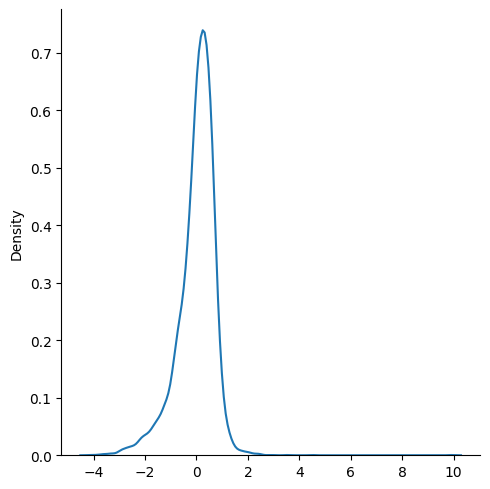

In [54]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [55]:
from sklearn.metrics import r2_score

In [56]:
score=r2_score(reg_pred,y_test)

In [57]:
score

0.33957429603867506